In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# sklean imports 
from sklearn.linear_model import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import *

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import *

In [2]:
# Set colour palette 
'''
greys = ['#767676', '#b3b3b3', '#212121']
sns.set_palette(sns.color_palette(greys))
'''

"\ngreys = ['#767676', '#b3b3b3', '#212121']\nsns.set_palette(sns.color_palette(greys))\n"

In [18]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Data preprocessing

In [3]:
df_raw = pd.read_csv('final_data.csv')
df_raw.head()

,Unnamed: 0,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,id
0,0,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,...,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2005,2YegxR5As7BeQuVp2U6pek
1,1,Dance,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,64,0.083,0.724,246333,0.689,...,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2005,2YegxR5As7BeQuVp2U6pek
2,2,Hip-Hop,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,...,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2005,2YegxR5As7BeQuVp2U6pek
3,3,Pop,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,...,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2005,2YegxR5As7BeQuVp2U6pek
4,4,Soul,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,...,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2005,2YegxR5As7BeQuVp2U6pek


In [7]:
def data_generation(df, features, sample_size):
    # Data set creation 
    df_temp = df.copy()
    df_temp = df_temp.loc[:, features]

    # Lets take a smaller sample for now 
    df_temp = df_temp.sample(frac = sample_size, random_state = 0)
    y = df_temp['popularity']
    X = df_temp.drop('popularity', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return([X_train, X_test, y_train, y_test])

In [8]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']

X_train, X_test, y_train, y_test = data_generation(df_raw, features, .2)

# Data exploration 

### Which features are popular now 

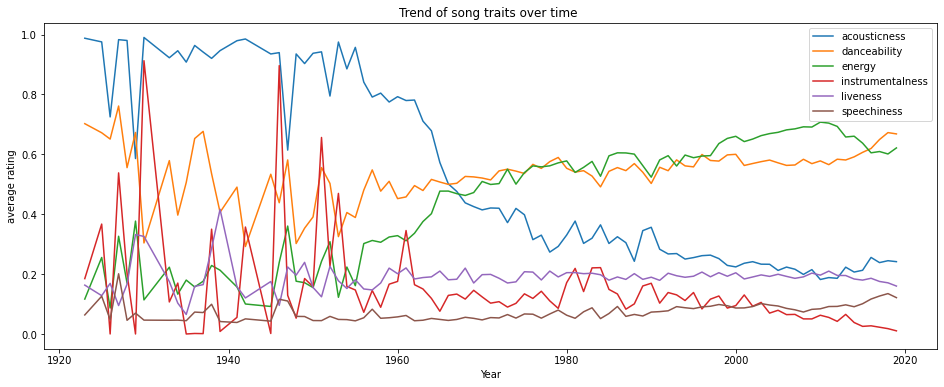

In [9]:
song_traits = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
               'speechiness']

#--------------------------------------------------------------------------------------------------
plt.figure(figsize=(16,6))
for trait in song_traits:
    fig = sns.lineplot(data = df_raw, x='year', y=str(trait),
                       ci=None, label=str(trait), estimator='mean')


fig.title.set_text('Trend of song traits over time ')
fig.set(xlabel='Year', ylabel='average rating')

plt.show()

# Data cleaning

- Should probably drop artist name 
- Should probably drop track name 
- Should probably drop track_id


In [10]:
df = df_raw.copy()

# Changing categorical variable mode
df.loc[df["mode"] == 'Major', "mode"] = 1
df.loc[df["mode"] == 'Minor', "mode"] = 0

# Changing categorical variable keys
list_of_keys = df['key'].unique()
for i in range(len(list_of_keys)):
    df.loc[df['key'] == list_of_keys[i], 'key'] = i

# Changing categorical variable time signature
list_of_time_signatures = df['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    df.loc[df['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i

# Changing popularity into binary variable 
df.loc[df['popularity'] < 57, 'popularity'] = 0 
df.loc[df['popularity'] >= 57, 'popularity'] = 1
df.loc[df['popularity'] == 1]
    

df = df.drop('Unnamed: 0', axis=1)
    
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,id
0,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.083,0.724,246333,0.689,0.0,0,0.304,-5.922,0,0.135,146.496,0,0.693,2005,2YegxR5As7BeQuVp2U6pek
1,Dance,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.083,0.724,246333,0.689,0.0,0,0.304,-5.922,0,0.135,146.496,0,0.693,2005,2YegxR5As7BeQuVp2U6pek
2,Hip-Hop,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.083,0.724,246333,0.689,0.0,0,0.304,-5.922,0,0.135,146.496,0,0.693,2005,2YegxR5As7BeQuVp2U6pek
3,Pop,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.083,0.724,246333,0.689,0.0,0,0.304,-5.922,0,0.135,146.496,0,0.693,2005,2YegxR5As7BeQuVp2U6pek
4,Soul,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.083,0.724,246333,0.689,0.0,0,0.304,-5.922,0,0.135,146.496,0,0.693,2005,2YegxR5As7BeQuVp2U6pek


# Comparing model performance 

In [13]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']
results = []
names = []

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, features, .2)

#--------------------------------------------------------------------------------------------------
temp = []
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('K Neigbor Classifier', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Support Vector Classifier', SVC()))
models.append(('Support Vector Machines', SVC(kernel = 'rbf')))
models.append(('Naive Bayes', GaussianNB()))
models.append(('MLP',  MLPClassifier(alpha=1, max_iter=1000)))



for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    temp.append([name, cv_results.mean(), cv_results.std()])

mdl_performance = pd.DataFrame(temp, columns=['model', 'score', 'score_std'])
mdl_performance = mdl_performance.sort_values('score', ascending=False)
mdl_performance

,model,score,score_std
1,Random Forest,0.717907,0.011419
3,Decision Tree,0.652817,0.013411
6,Naive Bayes,0.595372,0.016791
2,K Neigbor Classifier,0.558048,0.008817
4,Support Vector Classifier,0.547887,0.010262
5,Support Vector Machines,0.547887,0.010262
0,Logistic Regression,0.524849,0.000461
7,MLP,0.499698,0.024308


# Logistic regression

In [16]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']

parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-8,8,50),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, features, .1)

#--------------------------------------------------------------------------------------------------

model = LogisticRegression()
grid_search = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10,
                           scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


C:\Users\seanl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1000 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\seanl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\seanl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\seanl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
V

Best: 0.653051 using {'C': 0.15264179671752304, 'penalty': 'l2', 'solver': 'newton-cg'}


C:\Users\seanl\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\seanl\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\seanl\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\seanl\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\seanl\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

C:\Users\seanl\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\seanl\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\seanl\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\seanl\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\seanl\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

The Training Accuracy is:  0.6512072434607646
The Testing Accuracy is:  0.651307847082495
                 precision    recall  f1-score   support

did not default       0.69      0.63      0.66      2655
        default       0.61      0.67      0.64      2315

       accuracy                           0.65      4970
      macro avg       0.65      0.65      0.65      4970
   weighted avg       0.65      0.65      0.65      4970

The True Positive Rate is: [0.62975518 0.67386609]
The Precision is: [0.68891636 0.61344868]
The False positive rate is: [0.32613391 0.37024482]
The False Negative Rate is:  [0.37024482 0.32613391]

The average TPR is: 0.6518106348102322
The average Precision is: 0.6511825201507293
The average False positive rate is: 0.34818936518976784
The average False Negative Rate is: 0.34818936518976784


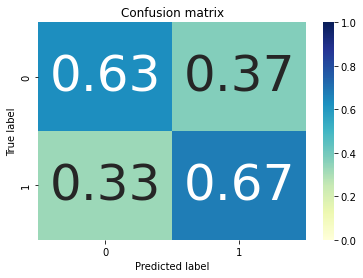

In [24]:
X_train, X_test, y_train, y_test = data_generation(df, features, .4)

#--------------------------------------------------------------------------------------------------
model = LogisticRegression(max_iter=500, penalty="l2", C=0.15264179671752304, solver='newton-cg')
model.fit(X_train, y_train)

#--------------------------------------------------------------------------------------------------
y_pred = (model.predict_proba(X_test)[:,1]>=0.491852).astype(int)

print("The Training Accuracy is: ", model.score(X_train, y_train))
print("The Testing Accuracy is: ", model.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=['did not default', 'default']))

#--------------------------------------------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = model.classes_, title='Confusion matrix')
plt.savefig('temp.png', transparent=True, dpi=600)

#--------------------------------------------------------------------------------------------------
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)

##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

C:\Users\seanl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.491852, G-Mean=0.655


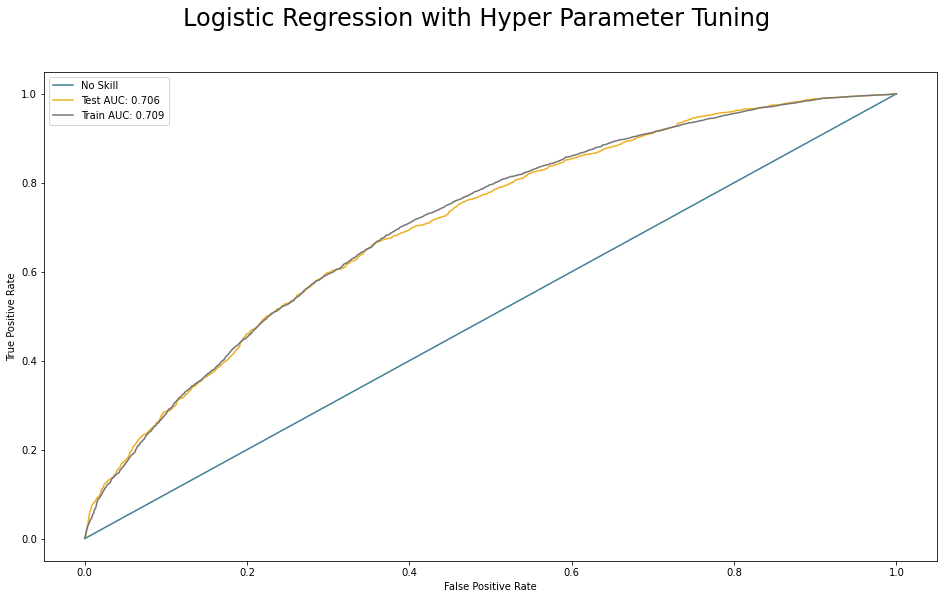

In [23]:
 #--------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,9))
fig = sns.lineplot([0,1], [0,1], label='No Skill', color='#3f7f93')

#--------------------------------------------------------------------------------------------------
# Test performance
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Test AUC: {round(auc,3)}', ci=None, color='#edb021')


#--------------------------------------------------------------------------------------------------
# Train performance
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

auc = roc_auc_score(y_train, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Train AUC: {round(auc,3)}', ci=None, color='#767676')


gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


#--------------------------------------------------------------------------------------------------
plt.legend()
fig.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
plt.suptitle('Logistic Regression with Hyper Parameter Tuning', fontsize = 24)
plt.savefig('temp.png', transparent=True)
plt.show()

# Random Forest

The Training Accuracy is:  0.646579476861167
The Testing Accuracy is:  0.6595573440643863
                 precision    recall  f1-score   support

did not default       0.70      0.64      0.66      1312
        default       0.63      0.69      0.66      1173

       accuracy                           0.66      2485
      macro avg       0.66      0.66      0.66      2485
   weighted avg       0.66      0.66      0.66      2485

The True Positive Rate is: [0.63567073 0.68883205]
The Precision is: [0.69557965 0.62830482]
The False positive rate is: [0.31116795 0.36432927]
The False Negative Rate is:  [0.36432927 0.31116795]

The average TPR is: 0.662251393134136
The average Precision is: 0.6619422354294727
The average False positive rate is: 0.33774860686586405
The average False Negative Rate is: 0.33774860686586405


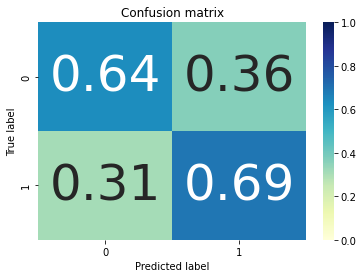

In [26]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, features, .2)

#--------------------------------------------------------------------------------------------------
mdl = RandomForestClassifier(n_estimators=400,
                            min_samples_leaf=.12,
                            random_state=1)

mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)

#--------------------------------------------------------------------------------------------------
y_pred = (model.predict_proba(X_test)[:,1]>=0.491852).astype(int)

print("The Training Accuracy is: ", model.score(X_train, y_train))
print("The Testing Accuracy is: ", model.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=['did not default', 'default']))

#--------------------------------------------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = model.classes_, title='Confusion matrix')
plt.savefig('temp.png', transparent=True, dpi=600)

#--------------------------------------------------------------------------------------------------
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)

##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

C:\Users\seanl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.491852, G-Mean=0.652


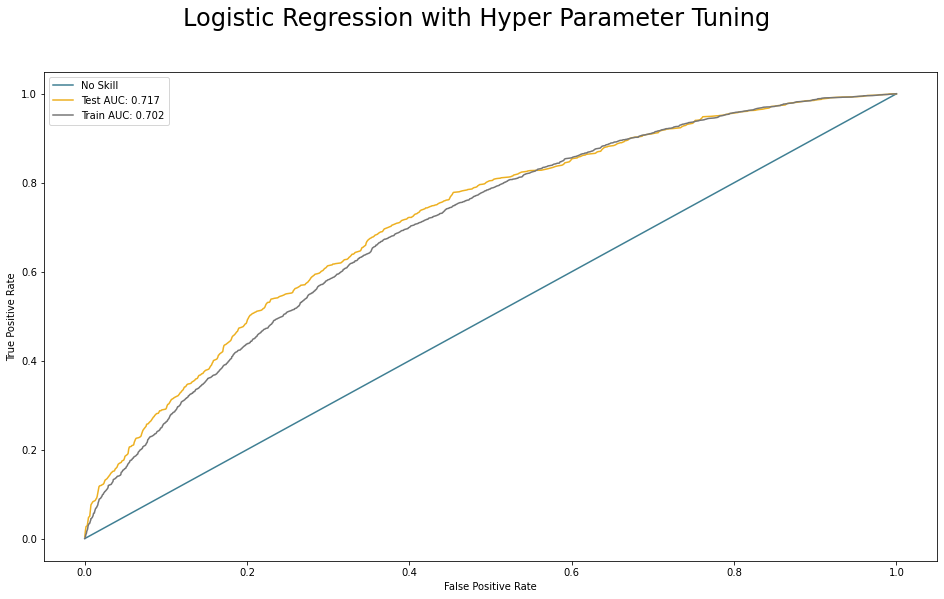

In [27]:
 #--------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,9))
fig = sns.lineplot([0,1], [0,1], label='No Skill', color='#3f7f93')

#--------------------------------------------------------------------------------------------------
# Test performance
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Test AUC: {round(auc,3)}', ci=None, color='#edb021')


#--------------------------------------------------------------------------------------------------
# Train performance
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

auc = roc_auc_score(y_train, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Train AUC: {round(auc,3)}', ci=None, color='#767676')


gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


#--------------------------------------------------------------------------------------------------
plt.legend()
fig.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
plt.suptitle('Logistic Regression with Hyper Parameter Tuning', fontsize = 24)
plt.savefig('temp.png', transparent=True)
plt.show()